In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
## input files folder
input_files_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"

In [3]:
## this file will map pseudocells to donors, it will also only including donors we have single cell data (a subset of all of HipSci donors)
sample_mapping_file = input_files_dir+"sample_mapping_file.csv"
sample_mapping = pd.read_csv(sample_mapping_file, dtype={"genotype_individual_id": str, "phenotype_sample_id": str})
sample_mapping.head()

,genotype_individual_id,phenotype_sample_id
0,HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--0
1,HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--1
2,HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--2
3,HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--3
4,HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--4


In [4]:
pseudocells = sample_mapping['phenotype_sample_id']

In [5]:
conditions = np.array([])
for pseudocell in pseudocells:
    condition = str(pseudocell).split("--")[2]
    conditions = np.append(conditions,[condition])

In [6]:
len(conditions)

9219

In [7]:
sample_mapping['condition'] = conditions
sample_mapping.tail()

,genotype_individual_id,phenotype_sample_id,condition
9214,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--8,d52_tr
9215,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--9,d52_tr
9216,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--10,d52_tr
9217,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--11,d52_tr
9218,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--12,d52_tr


In [8]:
df = pd.get_dummies(sample_mapping, columns=['condition'])
df.tail()

,genotype_individual_id,phenotype_sample_id,condition_d30,condition_d52_tr,condition_d52_untr
9214,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--8,0,1,0
9215,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--9,0,1,0
9216,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--10,0,1,0
9217,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--11,0,1,0
9218,HPSI0114i-rozh_4,HPSI0114i-rozh_4--DA--d52_tr--12,0,1,0


In [ ]:
df1 = df[["condition_d30","condition_d52_tr","condition_d52_untr"]]
df1.index = df['phenotype_sample_id'].values
df1.head()

In [10]:
# filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/C_discrete.csv"
# df1.to_csv(filename)

In [12]:
#### three discrete conditions (day 30, day 52, day 52 rotenone-treated)

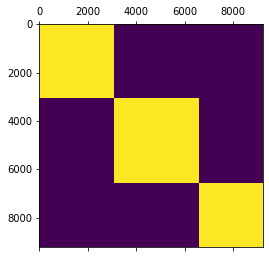

In [13]:
plt.matshow(df1 @ df1.T)

In [69]:
input_files_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
C_file = input_files_dir+"MOFA_20.csv"
C = pd.read_csv(C_file, index_col = 0)

In [15]:
C = xr.DataArray(C.values, dims=["cell", "pc"], coords={"cell": C.index.values, "pc": C.columns.values})
C_sorted = C.sel(cell=df1.index.values).values

In [16]:
C_sorted

array([[ 1.66645566,  0.58929172, -1.21803212, ..., -1.32102248,
         0.03628515, -0.52378424],
       [ 1.79327526, -1.08970828,  0.51619432, ..., -0.13014704,
         0.94184241,  0.66115213],
       [ 1.46017333, -0.92046638,  0.43337254, ...,  0.00434346,
        -0.10995757, -0.0299945 ],
       ...,
       [ 0.13994071,  0.81056563,  0.15068945, ..., -1.37857743,
        -0.454659  ,  0.15848179],
       [-0.15451616,  1.39880939,  0.20292395, ...,  1.1958214 ,
        -0.31553409, -1.43231431],
       [-0.06736465,  1.68061775,  0.29681317, ..., -0.57496769,
        -0.3382399 , -0.71828976]])

In [17]:
#### all continuous MOFA

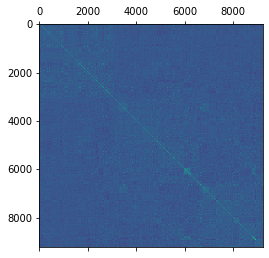

In [18]:
plt.matshow(C_sorted @ C_sorted.T)

In [19]:
######### now clustering cells based on MOFA

In [128]:
input_files_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
C_file = input_files_dir+"MOFA_20.csv"
C = pd.read_csv(C_file, index_col = 0)

In [129]:
C = xr.DataArray(C.values, dims=["cell", "pc"], coords={"cell": C.index.values, "pc": C.columns.values})

In [130]:
import anndata as ad
adata = ad.AnnData(X=C.values, obs=C.cell.values, var=C.pc.values, dtype='float')
adata

AnnData object with n_obs × n_vars = 9219 × 20
    obs: 0
    var: 0

In [131]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

In [132]:
adata.obs['leiden']

0       2
1       2
2       9
3       2
4       1
       ..
9214    0
9215    0
9216    4
9217    5
9218    5
Name: leiden, Length: 9219, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']

In [133]:
data = {"cell": C.cell.values, "cluster": adata.obs['leiden']}
df0 = pd.DataFrame(data)
df0.head()

,cell,cluster
0,HPSI0714i-iudw_1--DA--d30--0,2
1,HPSI0714i-iudw_1--DA--d30--1,2
2,HPSI0714i-iudw_1--DA--d30--2,9
3,HPSI0714i-iudw_1--DA--d30--3,2
4,HPSI0714i-iudw_1--DA--d30--4,1


In [134]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/18clusters.csv"
df0.to_csv(filename)

In [106]:
df = pd.get_dummies(df0, columns=['cluster'])
df.tail()

,cell,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
9214,HPSI0114i-rozh_4--DA--d52_tr--8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9215,HPSI0114i-rozh_4--DA--d52_tr--9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9216,HPSI0114i-rozh_4--DA--d52_tr--10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9217,HPSI0114i-rozh_4--DA--d52_tr--11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9218,HPSI0114i-rozh_4--DA--d52_tr--12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
df1 = df[list(df.columns)[1:]]
df1.index = df['cell'].values
df1.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
HPSI0714i-iudw_1--DA--d30--0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/C_discrete_18clusters.csv"
df1.to_csv(filename)

In [109]:
df1.sort_values(by=list(df1.columns), axis=0, ascending=False, inplace=True)

/nfs/software/stegle/users/acuomo/conda-envs/spatialde/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


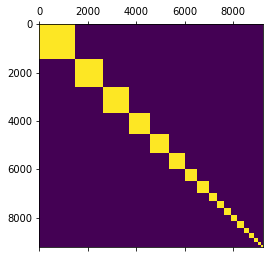

In [110]:
plt.matshow(df1 @ df1.T)

In [135]:
input_files_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
C_file = input_files_dir+"MOFA_20.csv"
C = pd.read_csv(C_file, index_col = 0)

In [136]:
C = xr.DataArray(C.values, dims=["cell", "pc"], coords={"cell": C.index.values, "pc": C.columns.values})
C_sorted = C.sel(cell=df1.index.values).values

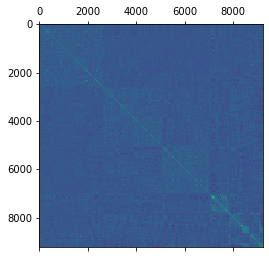

In [137]:
plt.matshow(C_sorted @ C_sorted.T)

In [138]:
# different clustering

In [139]:
# ?sc.tl.leiden

In [140]:
sc.tl.leiden(adata, resolution=0.3)

In [141]:
adata.obs['leiden']

0       0
1       0
2       0
3       0
4       0
       ..
9214    2
9215    2
9216    3
9217    3
9218    3
Name: leiden, Length: 9219, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

In [142]:
data = {"cell": C.cell.values, "cluster": adata.obs['leiden']}
df0 = pd.DataFrame(data)
df0.head()

,cell,cluster
0,HPSI0714i-iudw_1--DA--d30--0,0
1,HPSI0714i-iudw_1--DA--d30--1,0
2,HPSI0714i-iudw_1--DA--d30--2,0
3,HPSI0714i-iudw_1--DA--d30--3,0
4,HPSI0714i-iudw_1--DA--d30--4,0


In [143]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/9clusters.csv"
df0.to_csv(filename)

In [119]:
df = pd.get_dummies(df0, columns=['cluster'])
df.tail()

,cell,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
9214,HPSI0114i-rozh_4--DA--d52_tr--8,0,0,1,0,0,0,0,0,0
9215,HPSI0114i-rozh_4--DA--d52_tr--9,0,0,1,0,0,0,0,0,0
9216,HPSI0114i-rozh_4--DA--d52_tr--10,0,0,0,1,0,0,0,0,0
9217,HPSI0114i-rozh_4--DA--d52_tr--11,0,0,0,1,0,0,0,0,0
9218,HPSI0114i-rozh_4--DA--d52_tr--12,0,0,0,1,0,0,0,0,0


In [120]:
df1 = df[list(df.columns)[1:]]
df1.index = df['cell'].values
df1.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
HPSI0714i-iudw_1--DA--d30--0,1,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--1,1,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--2,1,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--3,1,0,0,0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--4,1,0,0,0,0,0,0,0,0


In [122]:
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/C_discrete_9clusters.csv"
df1.to_csv(filename)

In [123]:
df1.sort_values(by=list(df1.columns), axis=0, ascending=False, inplace=True)

/nfs/software/stegle/users/acuomo/conda-envs/spatialde/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


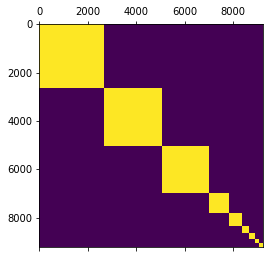

In [124]:
plt.matshow(df1 @ df1.T)

In [125]:
input_files_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
C_file = input_files_dir+"MOFA_20.csv"
C = pd.read_csv(C_file, index_col = 0)

In [126]:
C = xr.DataArray(C.values, dims=["cell", "pc"], coords={"cell": C.index.values, "pc": C.columns.values})
C_sorted = C.sel(cell=df1.index.values).values

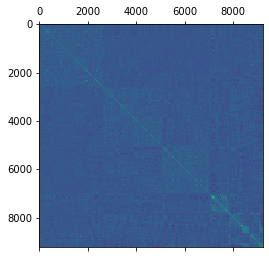

In [127]:
plt.matshow(C_sorted @ C_sorted.T)